#  Read and Export data

The functions in the previous tutorial make plotting pretty automatic, using matplotlib's standard style. But sometimes, you might just want to read the data without immediately plotting it—maybe to style it your own way or to convert it into a different format.

In [1]:
from __future__ import annotations
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import matplotlib.pyplot as plt

from spinplots.io import read_nmr
from spinplots.utils import nmr_df

## Customize spinplots

In the previous tutorial, we used `bruker1d(['../../data/1D/glycine/pdata/1'], xlim=(250, -20))` to create a simple <sup>13</sup>C NMR plot. By adding the option `return_fig=True`, you can return the figure object, which allows you to further customize the appearance of the spectrum as you like.

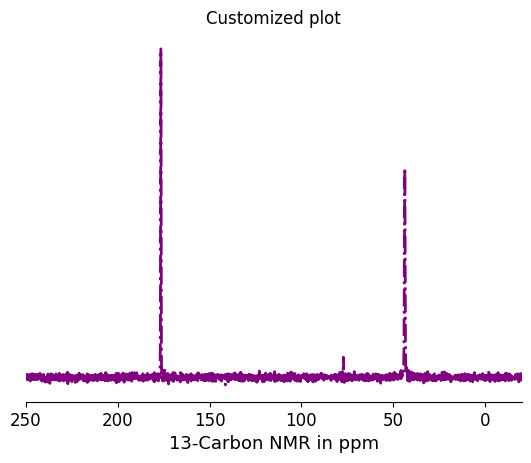

In [2]:
gly = read_nmr("../../data/1D/glycine/pdata/1")
fig, ax = gly.plot(xlim=(250, -20), return_fig=True)
ax.set_title("Customized plot")
ax.set_xlabel("13-Carbon NMR in ppm")
ax.lines[0].set_color("purple")
ax.lines[0].set_linewidth(2)
ax.lines[0].set_linestyle("-.")
fig.savefig("../../data/1D/customized_plot.png")

## Export data to Pandas and CSV

A different option is to use the `nmr_df` function from `spinplots.utils` to get a Pandas DataFrame. This way, you can manipulate the data however you like before plotting.

In [3]:
df_nmr = nmr_df("../../data/1D/glycine/pdata/1")
df_nmr

,hz,ppm,intensity,norm_intensity,nuclei
0,62320.002580,619.310059,36928800.0,0.004269,13C
1,62318.476701,619.294895,40210336.0,0.004648,13C
2,62316.950822,619.279732,39049024.0,0.004514,13C
3,62315.424943,619.264568,33449568.0,0.003867,13C
4,62313.899064,619.249404,23894656.0,0.002762,13C
...,...,...,...,...,...
65531,-37672.368025,-374.372200,-20542656.0,-0.002375,13C
65532,-37673.893904,-374.387363,-8086976.0,-0.000935,13C
65533,-37675.419783,-374.402527,5093344.0,0.000589,13C
65534,-37676.945662,-374.417690,17696256.0,0.002046,13C


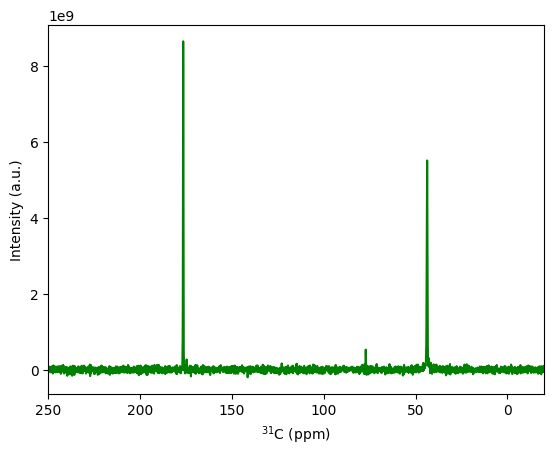

In [4]:
plt.plot(df_nmr["ppm"], df_nmr["intensity"], color="green")
plt.xlim(250, -20)
plt.xlabel("$^{31}$C (ppm)")
plt.ylabel("Intensity (a.u.)")
plt.show()

## Convert data in the terminal

Pandas DataFrames can be easily exported to other formats such as `.csv`. You can do this directly in your code with `df.to_csv('exported_data.csv')`, or use the `bruker2csv` function from the terminal for a quick export.

In [ ]:
bruker2csv ../../data/1D/glycine/pdata/1 ../../data/1D/exported_data.csv